<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Alex!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Alex,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.

**🚧 Suggested Tweaks & Areas for Attention**

- Avoid converting costs per minute/message to integers (which results in zero values in our case).
- Fill NaN values with 0 before conducting the analysis.
- Add interim conclusions to the analysis section.
- Formulate hypotheses for each test.
   
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
I appreciate the effort you have put into revising your project.  There are no issues left, so your project has been accepted. I wish you engaging projects in the upcoming sprints! ☘️
    
PS: As a final note, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  
    
Another great self-paced course that covers basic concepts in probability and statistics - Probability and Statistics by Stanford Online or you could check this one [An Introduction to Statistical Learning with Applications in R](https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/) 🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job keeping the additional information about the project goal! Additionally, you could add a short description of the tasks you plan to perform and the available data. This information could be helpful for the notebook reader.



## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns
# Loading all the libraries



## Load data

"C:\Users\ether\OneDrive\Documents\python\megaline_calls.csv"
df_users = pd.read_csv(f"{filepath}\\megaline_users.csv") 


In [2]:
users = pd.read_csv('/datasets/megaline_users.csv') 
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')


## Prepare the data

## Plans

In [3]:
print(plans.info())
print(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

In [4]:
# Print a sample of data for plans
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

In this data it looks like one column could use a rename and usd_per_minute/usd_per_message could be changed to int but i dont think its necessary, and lastly find cost per unit.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [5]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
plans = plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'})

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

Converting decimal values to int64 is causing all your per-minute and per-message rates to become zero which have been later used in the revenue calculation. 

Could you please update this?

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Thank you for updating it! 


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [7]:
#check cost per unit
plans['cost_per_minute'] = plans['usd_monthly_fee'] / plans['minutes_included']
plans['cost_per_message'] = plans['usd_monthly_fee'] / plans['messages_included']
plans['cost_per_gb'] = plans['usd_monthly_fee'] / (plans['mb_per_month_included']/1024)

## Users

In [8]:
# Print the general/summary information about the users' DataFrame
print(users.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Print a sample of data for users
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

It looks like reg_date and churn_date need to be change to date/time and remove all NaN variables.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
print(users.isna().sum())
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
users['tenure_days'] = (pd.to_datetime('today') - users['reg_date']).dt.days
users['churned'] = users['churn_date'].notna()

## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
print(calls.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
# Print a sample of data for calls
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

It looks like call_date needs to be changed to date/time, the NaN values need to be fixed,and the duration column needs to be rounded up.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job! Good that you did not forget about data rounding. As a second approach you could also use `np.ceil ()` function.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
users['tenure_days'] = (pd.to_datetime('today') - users['reg_date']).dt.days
users['churned'] = users['churn_date'].notna()

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame

print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
# Print a sample of data for messages

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Change message_date to dat/time and change the days of the week to integers we can work with.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
messages['message_weekday'] = messages['message_date'].dt.weekday

## Internet

In [20]:
# Print the general/summary information about the internet DataFrame
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [21]:
# Print a sample of data for the internet traffic
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Change session_date to date/time

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
#none

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [24]:
# Print out the plan conditions and make sure they are clear for you
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   cost_per_minute        2 non-null      float64
 9   cost_per_message       2 non-null      float64
 10  cost_per_gb            2 non-null      float64
dtypes: float64(5), int64(5), object(1)
memory usage: 304.0+ bytes
None


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Everything is correct here 💫

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [25]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user = calls.groupby(['user_id', calls['call_date'].dt.to_period('M')]) \
                     .size() \
                     .reset_index(name='call_count')

In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_agg = calls.groupby([
    'user_id', 
    calls['call_date'].dt.to_period('M')
]).agg(
    call_count=('duration', 'count'),
    total_minutes=('duration', 'sum')
).reset_index().rename(columns={'call_date': 'month'})

In [27]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_agg = messages.groupby([
    'user_id',
    messages['message_date'].dt.to_period('M')
]).agg(
    message_count=('id', 'count')
).reset_index().rename(columns={'message_date': 'month'})


In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_agg = internet.groupby([
    'user_id',
    internet['session_date'].dt.to_period('M') 
]).agg(
    total_mb=('mb_used', 'sum'),
    session_count=('mb_used', 'count')
).reset_index().rename(columns={'session_date': 'month'})
internet_agg['total_gb'] = internet_agg['total_mb'].apply(lambda x: math.ceil(x / 1024))

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = pd.merge(
    calls_agg,
    messages_agg,
    on=['user_id', 'month'],
    how='outer'
).merge(
    internet_agg[['user_id', 'month', 'total_gb']],
    on=['user_id', 'month'],
    how='outer'
)

In [30]:
# Add the plan information
final_data = merged_data.merge(
    users[['user_id', 'plan']],
    on='user_id',
    how='left'
).merge(
    plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Everything is correct here. Indeed, we need to use either `how=outer` or `concat` join here.

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [31]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    """
    Calculate monthly revenue for a user based on their usage and plan
    """
    # Base monthly fee
    revenue = row['usd_monthly_fee']
    
    # Calculate extra minutes charge
    extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
    revenue += extra_minutes * row['usd_per_minute']
    
    # Calculate extra messages charge
    extra_messages = max(0, row['message_count'] - row['messages_included'])
    revenue += extra_messages * row['usd_per_message']
    
    # Calculate extra data charge (convert included MB to GB)
    included_gb = row['mb_per_month_included'] / 1024
    extra_gb = max(0, row['total_gb'] - included_gb)
    revenue += extra_gb * row['usd_per_gb']
    
    return revenue

# Apply the revenue calculation to each row
final_data['monthly_revenue'] = final_data.apply(calculate_monthly_revenue, axis=1)

# Round to 2 decimal places for currency
final_data['monthly_revenue'] = final_data['monthly_revenue'].round(2)

# Display sample results
print("Sample revenue calculations:")
print(final_data[['user_id', 'month', 'plan', 'total_minutes', 'message_count', 
                 'total_gb', 'monthly_revenue']].head(10))



Sample revenue calculations:
   user_id    month      plan  total_minutes  message_count  total_gb  \
0     1000  2018-12  ultimate          124.0           11.0       2.0   
1     1001  2018-08      surf          182.0           30.0       7.0   
2     1001  2018-09      surf          315.0           44.0      14.0   
3     1001  2018-10      surf          393.0           53.0      22.0   
4     1001  2018-11      surf          426.0           36.0      19.0   
5     1001  2018-12      surf          412.0           44.0      19.0   
6     1002  2018-10      surf           59.0           15.0       7.0   
7     1002  2018-11      surf          386.0           32.0      19.0   
8     1002  2018-12      surf          384.0           41.0      15.0   
9     1003  2018-12      surf         1104.0           50.0      27.0   

   monthly_revenue  
0            70.00  
1            20.00  
2            20.00  
3            90.09  
4            60.00  
5            60.00  
6            20.00  

<AxesSubplot:>

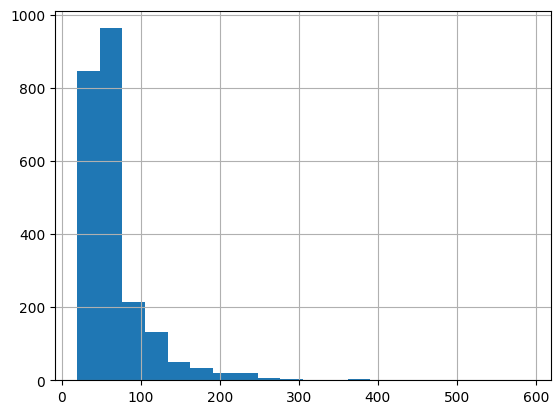

In [32]:
final_data = final_data.fillna(0)
final_data['monthly_revenue'].hist(bins=20)

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

When calculating the mean of a dataset, it is common to fill missing values (i.e. NaN) with 0. This is because the mean is calculated by summing up all of the values in a dataset and then dividing by the number of values. If there are missing values in the dataset, the sum will not include those values, and the mean will be calculated based on a smaller sample size. This can lead to a biased or misleading result.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
👏

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls


Call Duration Stats:
                 mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


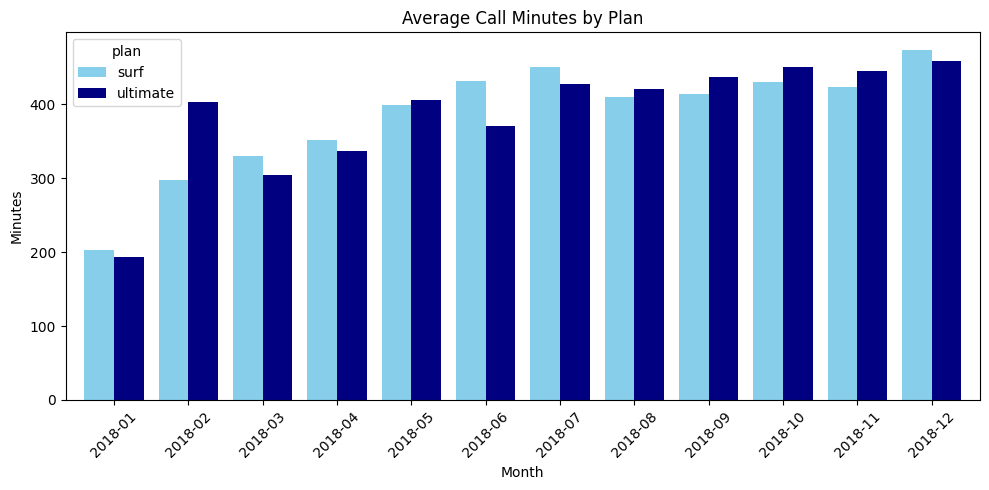

In [33]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_mins = final_data.groupby(['month', 'plan'])['total_minutes'].mean().unstack()
fig, ax = plt.subplots(figsize=(10,5))
avg_mins.plot(kind='bar', ax=ax, color=['skyblue','navy'], width=0.8)
ax.set(title='Average Call Minutes by Plan', 
      xlabel='Month', 
      ylabel='Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
stats = final_data.groupby('plan')['total_minutes'].agg(['mean','var'])
print("\nCall Duration Stats:\n", stats)

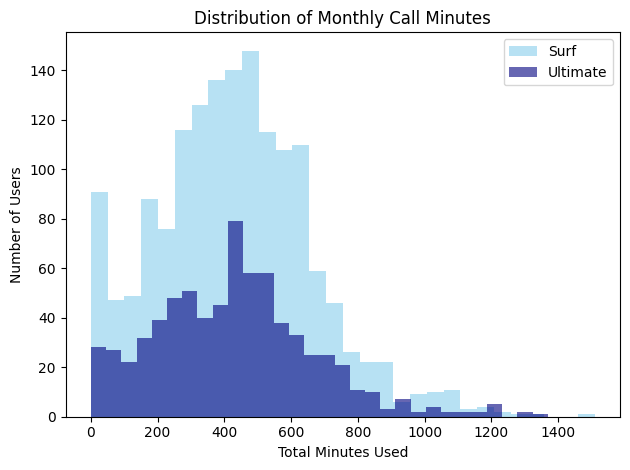

In [34]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.hist(
    final_data[final_data['plan'] == 'surf']['total_minutes'],
    bins=30,
    alpha=0.6,
    color='skyblue',
    label='Surf'
)

plt.hist(
    final_data[final_data['plan'] == 'ultimate']['total_minutes'],
    bins=30,
    alpha=0.6,
    color='navy',
    label='Ultimate'
)
plt.title('Distribution of Monthly Call Minutes')
plt.xlabel('Total Minutes Used')
plt.ylabel('Number of Users')
plt.legend()

plt.tight_layout()
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [35]:
# Calculate the mean and the variance of the monthly call duration

duration_stats = final_data.groupby('plan')['total_minutes'].agg(['mean', 'var'])
print(duration_stats)

                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


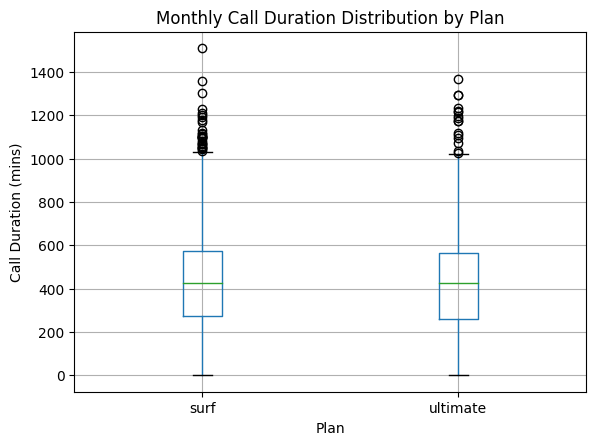

In [36]:
# Plot a boxplot to visualize the distribution of the monthly call duration
final_data.boxplot(column='total_minutes', by='plan')

plt.title('Monthly Call Duration Distribution by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Call Duration (mins)')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

It appears that more people use the surf pland and more minutes get used overall on the surf plan.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">
 
<b>Reviewer's comment v1:</b>
    
Great analysis! Like the structure and that you've used different types of charts to check data. 

### Messages

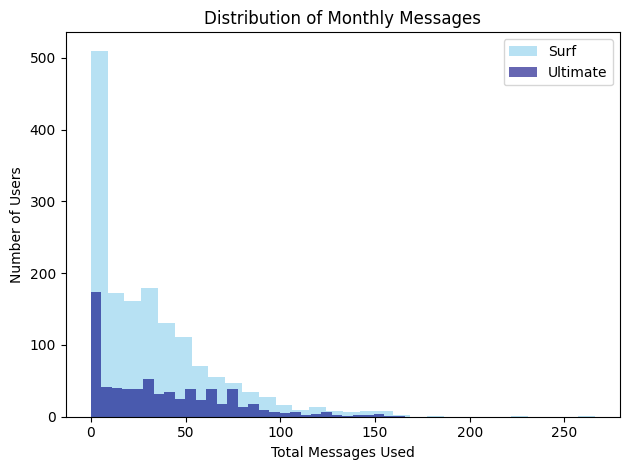

In [37]:
# Compare the number of messages users of each plan tend to send each month

plt.hist(
    final_data[final_data['plan'] == 'surf']['message_count'],
    bins=30,
    alpha=0.6,
    color='skyblue',
    label='Surf'
)

plt.hist(
    final_data[final_data['plan'] == 'ultimate']['message_count'],
    bins=30,
    alpha=0.6,
    color='navy',
    label='Ultimate'
)
plt.title('Distribution of Monthly Messages')
plt.xlabel('Total Messages Used')
plt.ylabel('Number of Users')
plt.legend()

plt.tight_layout()
plt.show()


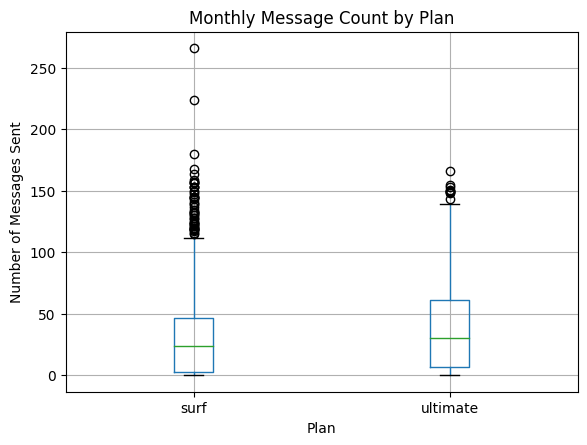

In [38]:
final_data.boxplot(column='message_count', by='plan')

plt.title('Monthly Message Count by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Number of Messages Sent')
plt.show()



Message Useage Stats:
                mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744


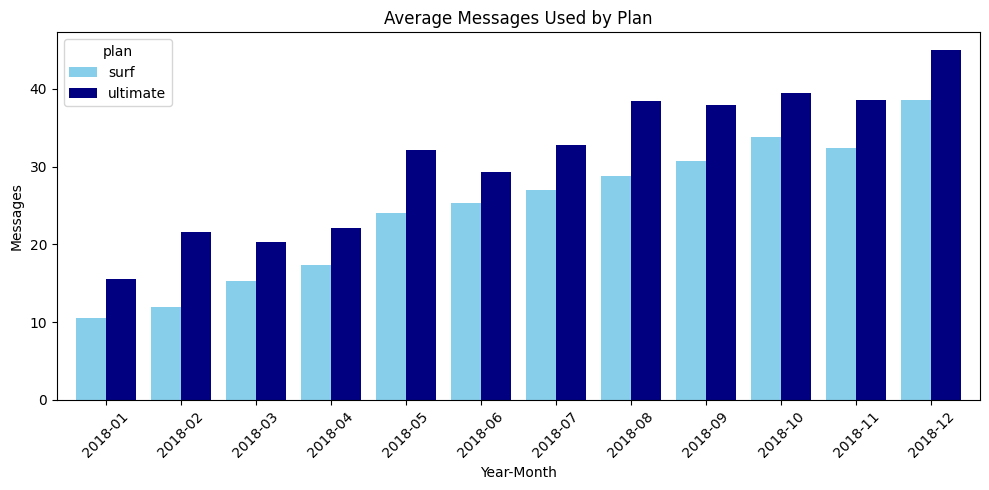

In [39]:
avg_mins = final_data.groupby(['month', 'plan'])['message_count'].mean().unstack()
fig, ax = plt.subplots(figsize=(10,5))
avg_mins.plot(kind='bar', ax=ax, color=['skyblue','navy'], width=0.8)
ax.set(title='Average Messages Used by Plan', 
      xlabel='Year-Month', 
      ylabel='Messages')
plt.xticks(rotation=45)
plt.tight_layout()
stats = final_data.groupby('plan')['message_count'].agg(['mean','var'])
print("\nMessage Useage Stats:\n", stats)

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]
It looks like there are more messages that are sent on the Ultimate plan than on the surf plan despite there being a lot more users on the surf plan.

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
To avoid repetitive code, you could use functions. 

### Internet

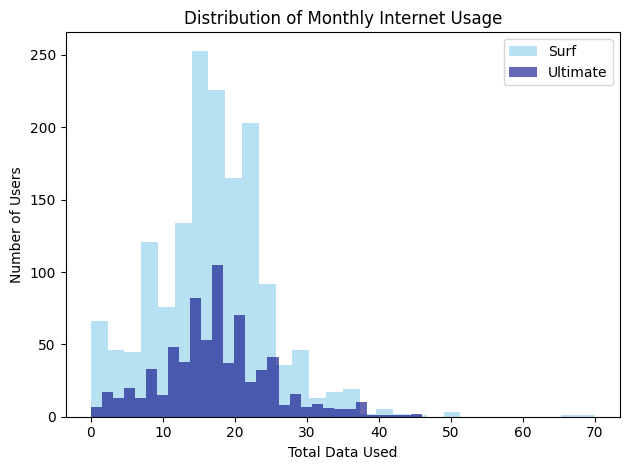

In [40]:
# Compare the amount of internet traffic consumed by users per plan
plt.hist(
    final_data[final_data['plan'] == 'surf']['total_gb'],
    bins=30,
    alpha=0.6,
    color='skyblue',
    label='Surf'
)

plt.hist(
    final_data[final_data['plan'] == 'ultimate']['total_gb'],
    bins=30,
    alpha=0.6,
    color='navy',
    label='Ultimate'
)
plt.title('Distribution of Monthly Internet Usage')
plt.xlabel('Total Data Used')
plt.ylabel('Number of Users')
plt.legend()

plt.tight_layout()
plt.show()



Internet Useage Stats:
                mean       var
plan                         
surf      16.670693  61.58360
ultimate  17.306944  58.83055


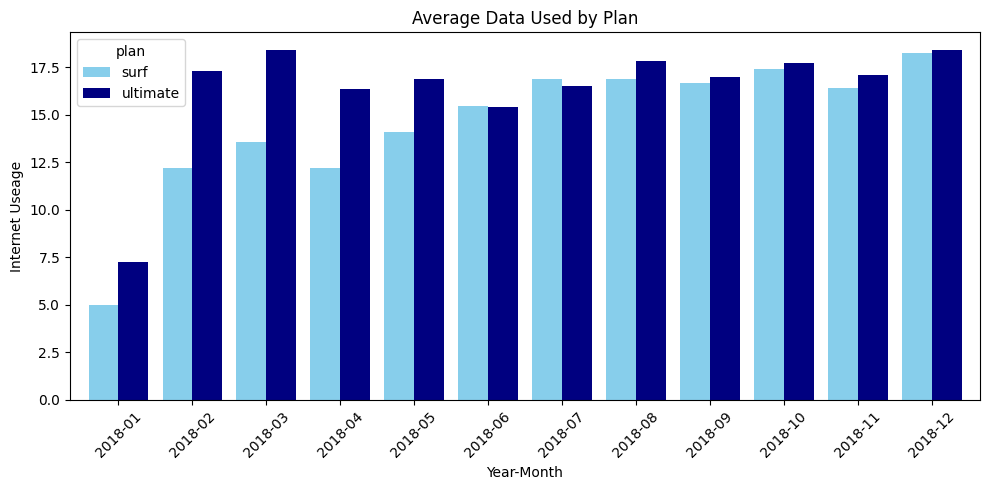

In [41]:
avg_mins = final_data.groupby(['month', 'plan'])['total_gb'].mean().unstack()
fig, ax = plt.subplots(figsize=(10,5))
avg_mins.plot(kind='bar', ax=ax, color=['skyblue','navy'], width=0.8)
ax.set(title='Average Data Used by Plan', 
      xlabel='Year-Month', 
      ylabel='Internet Useage')
plt.xticks(rotation=45)
plt.tight_layout()
stats = final_data.groupby('plan')['total_gb'].agg(['mean','var'])
print("\nInternet Useage Stats:\n", stats)

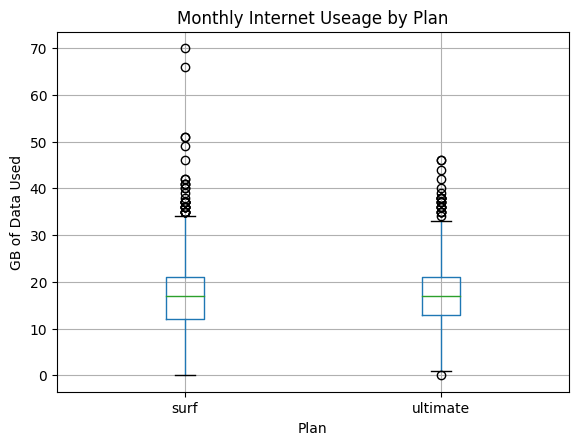

In [42]:
final_data.boxplot(column='total_gb', by='plan')

plt.title('Monthly Internet Useage by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('GB of Data Used')
plt.show()


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

It looks like there are a lot more users on the surf plan that arent usiong their data as much as those with the ultimate plan. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]


Internet Useage Stats:
                mean          var
plan                            
surf      60.706408  3067.835152
ultimate  72.313889   129.848486


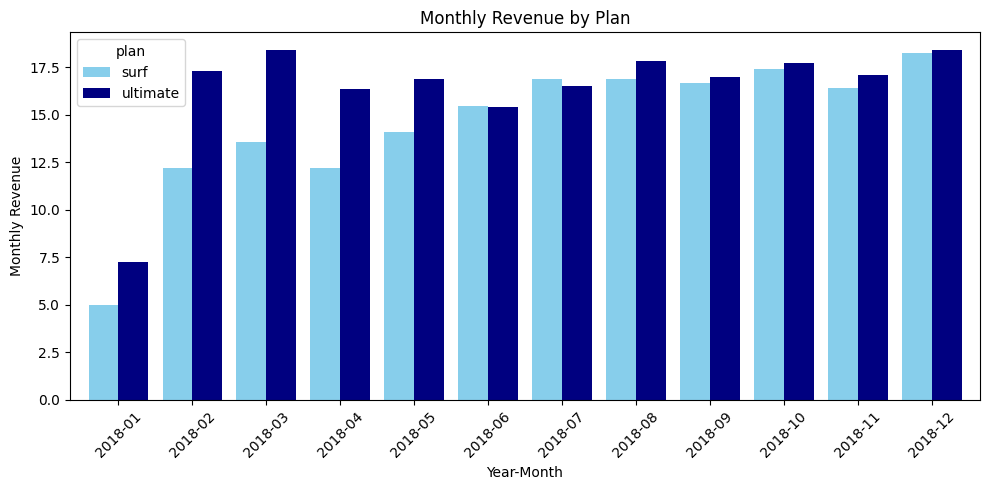

In [43]:
avg_rev = final_data.groupby(['month', 'plan'])['monthly_revenue'].mean().unstack()
fig, ax = plt.subplots(figsize=(10,5))
avg_mins.plot(kind='bar', ax=ax, color=['skyblue','navy'], width=0.8)
ax.set(title='Monthly Revenue by Plan', 
      xlabel='Year-Month', 
      ylabel='Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
stats = final_data.groupby('plan')['monthly_revenue'].agg(['mean','var'])
print("\nInternet Useage Stats:\n", stats)

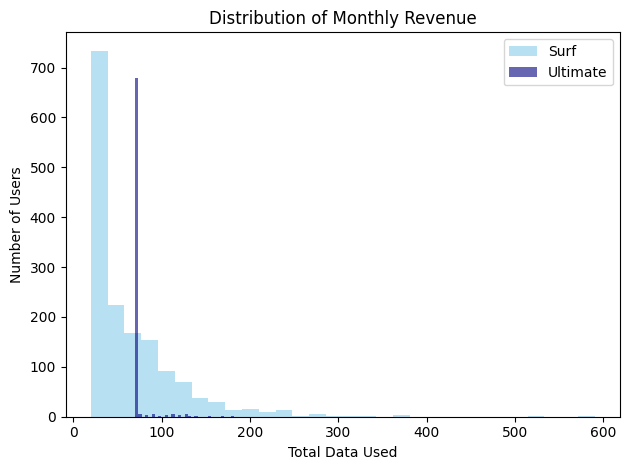

In [44]:
plt.hist(
    final_data[final_data['plan'] == 'surf']['monthly_revenue'],
    bins=30,
    alpha=0.6,
    color='skyblue',
    label='Surf'
)

plt.hist(
    final_data[final_data['plan'] == 'ultimate']['monthly_revenue'],
    bins=30,
    alpha=0.6,
    color='navy',
    label='Ultimate'
)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Total Data Used')
plt.ylabel('Number of Users')
plt.legend()

plt.tight_layout()
plt.show()


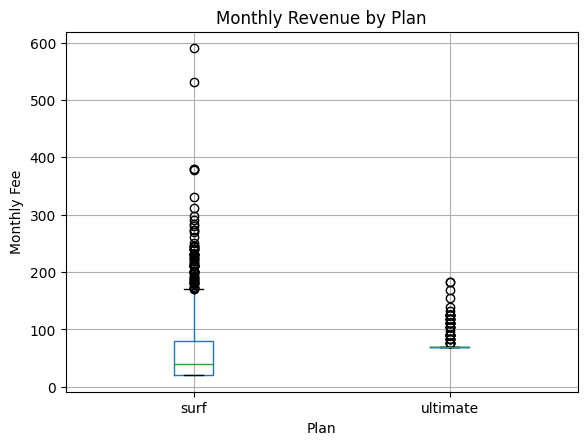

In [45]:
final_data.boxplot(column='monthly_revenue', by='plan')

plt.title('Monthly Revenue by Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Monthly Fee')
plt.show()


[Formulate conclusions about how the revenue differs between the plans.]
It seems like the users on the surf plan are paying mroe due to fees and overages. however, the ultimate users are paying more per month.

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

Could you please add interim conclusions after each subsection in this part? 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. It's great that you combined both plans in one graph for comparison and also used different graph types to check the available data.
- If you have time and are willing to practice, you can display two charts (a histogram and a boxplot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]


[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis : surf = ultimate (average revenue is equal)
Alternative Hypothesis : surf is not equal to ultimate (average revenue differs)

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

Could you please formulate both a null hypothesis (H0) and an alternative hypothesis (H1) for each question before performing the actual hypothesis tests? Please include these hypotheses in the markdown cell.

**H0 (Null Hypothesis):** This typically represents the default assumption or the statement that there is no effect or no difference.

**H1 (Alternative Hypothesis):** This represents the statement you are testing for-usually that there is an effect or a difference.


Clearly stating the null and alternative hypotheses before testing is a best practice in statistical analysis. It ensures that the purpose of the test is well-defined and helps avoid bias in interpreting the results.

In [46]:
# Test the hypotheses
surf_rev = final_data[final_data['plan'] == 'surf']['monthly_revenue']
ultimate_rev = final_data[final_data['plan'] == 'ultimate']['monthly_revenue']

alpha=.05

results = st.ttest_ind(surf_rev, ultimate_rev, equal_var = False)

print(results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

3.1703905481135734e-15
We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis: NY/NJ = others (average revenue is equal)
Alternative Hypothesis: NY/NJ is not equal to others (average revenue differs)

In [47]:
merged_data = users.merge(final_data, on='user_id', how='inner')

In [48]:
users['state'] = users['city'].str.extract(r', ([A-Z]{2})')[0]
ny_nj_users = users[users['state'].isin(['NY', 'NJ'])]['user_id']

ny_nj_revenue = final_data[final_data['user_id'].isin(ny_nj_users)]['monthly_revenue']
other_revenue = final_data[~final_data['user_id'].isin(ny_nj_users)]['monthly_revenue']

alpha = 0.05 
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, 
                                 equal_var=False, nan_policy='omit')
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis - Significant revenue difference exists")
else:
    print("Fail to reject the null hypothesis - No significant revenue difference")


0.0902061652931304
Fail to reject the null hypothesis - No significant revenue difference


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
Could you please also print `p-value` for each test - an important piece of the information for the reader.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
- Everything is correct here.
- Your conclusions based on the results are also correct.
- You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)
    

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

It seems to me that wil overages and all else considered tha the surf plan is the better plan for revenue. It has less minutes and data allowed meaning those overage fees will be hitting a lot more often because the data shows the useage is a lot higher. The ultimate plan seems to be the better deal for the consumer but gets used slightly less

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

    
Overall, you conducted excellent research with accurate interim findings, clean code, and clear visualizations.

I also appreciate your overall conclusions. They are well-structured and provide valuable insights into what you achieved, as well as recommendations for the business.